# Hw 3

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
hw3csv = pd.read_csv('data/hw3.csv')
df = hw3csv
# hw3csv.head(14)

In [3]:
# pd.isnull(hw3csv.head(30))
hw3csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


2667 entries total, close has 2531 non nulls and 136 nulls

In [4]:
df.duplicated().sum()

307

307 duplicate rows

plot by chain

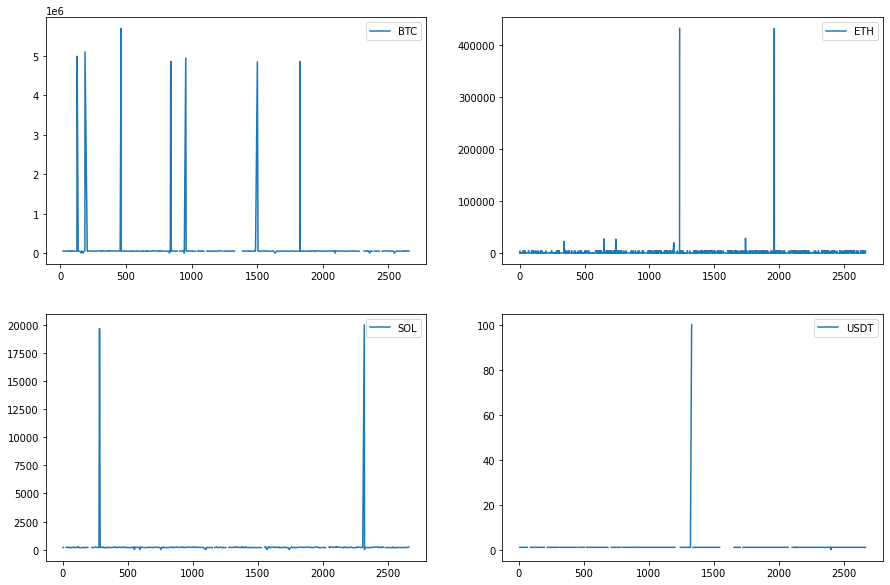

In [5]:
chains_in_df = df.chain.unique()

fig, axes = plt.subplots(nrows=math.ceil(chains_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chains_in_df.size / 2)))

idx = 0
for label, df_chain in df[['chain', 'close']].groupby('chain'):
    df_chain['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


let's get a plan of attack:
1. Let's remove the duplicated rows
2. Let's use a heuristic for missing close price as average of high + low of they day

After this, we can take a look at our chart and see how we want to deal with the outliers

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.groupby('chain').size().sum()

2360

use the heuristic for missing close prices as average of high + low of the day

In [9]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

/Users/alexmccall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
# df.groupby('chain').size().sum()
# df.info()
pd.isnull(df).sum()

ts              0
open            0
high          450
low           256
close          33
volume          0
volumeUSD    2360
token           0
chain           0
dtype: int64

still missing some...

lets replace missing highs and lows with opens and repeat above heuristic

In [11]:
# replace missing highs:
df.loc[df['high'].isnull(), 'high'] = (df.loc[df['high'].isnull(), 'open'])
# replace missing lows:
df.loc[df['low'].isnull(), 'low'] = (df.loc[df['low'].isnull(), 'open'])

In [12]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

In [13]:
# df.info()

In [14]:
pd.isnull(df).sum()

ts              0
open            0
high            0
low             0
close           0
volume          0
volumeUSD    2360
token           0
chain           0
dtype: int64

no more missing data

duplicates successfully dropped

plot again

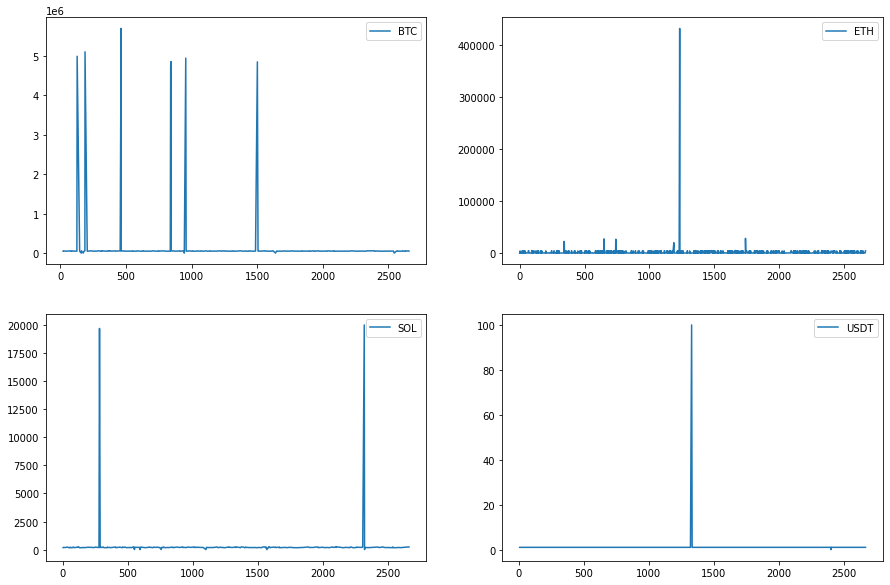

In [15]:
chains_in_df = df.chain.unique()

fig, axes = plt.subplots(nrows=math.ceil(chains_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chains_in_df.size / 2)))

idx = 0
for label, df_chain in df[['chain', 'close']].groupby('chain'):
    df_chain['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


Let's come up with a heuristic to define an outlier, as something where the close price is greater than 2x higher or lower than the open price (given this is hourly data, we shouldn't expect it to change that much)

In [16]:
df.loc[df.close / df.open >= 2].shape

(26, 9)

there are 26 outliers by this heuristic

use average of high and low heuristic to replace outliers

In [17]:
df.loc[df.close / df.open >= 2 , 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])
df.loc[df.close / df.open <= .5 , 'close'] = 0.5 * (df.loc[df.close / df.open <= .5, 'high'] + df.loc[df.close / df.open <= .5, 'low'])

/Users/alexmccall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2360 non-null   object 
 1   open       2360 non-null   float64
 2   high       2360 non-null   float64
 3   low        2360 non-null   float64
 4   close      2360 non-null   float64
 5   volume     2360 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2360 non-null   object 
 8   chain      2360 non-null   object 
dtypes: float64(6), object(3)
memory usage: 184.4+ KB


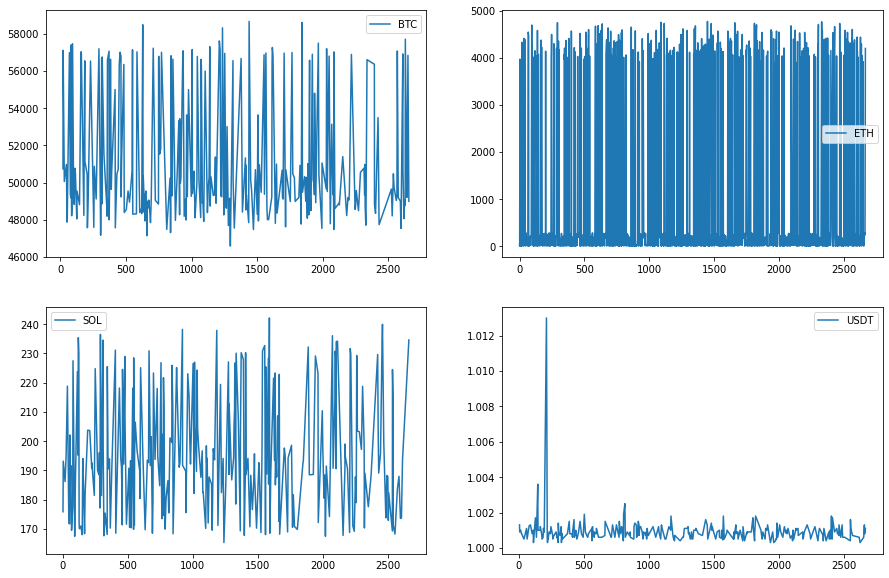

In [19]:
chains_in_df = df.chain.unique()

fig, axes = plt.subplots(nrows=math.ceil(chains_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chains_in_df.size / 2)))

idx = 0
for label, df_chain in df[['chain', 'close']].groupby('chain'):
    df_chain['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


I assume 12% outlier on is not crazy

ETH looks weird, check by token

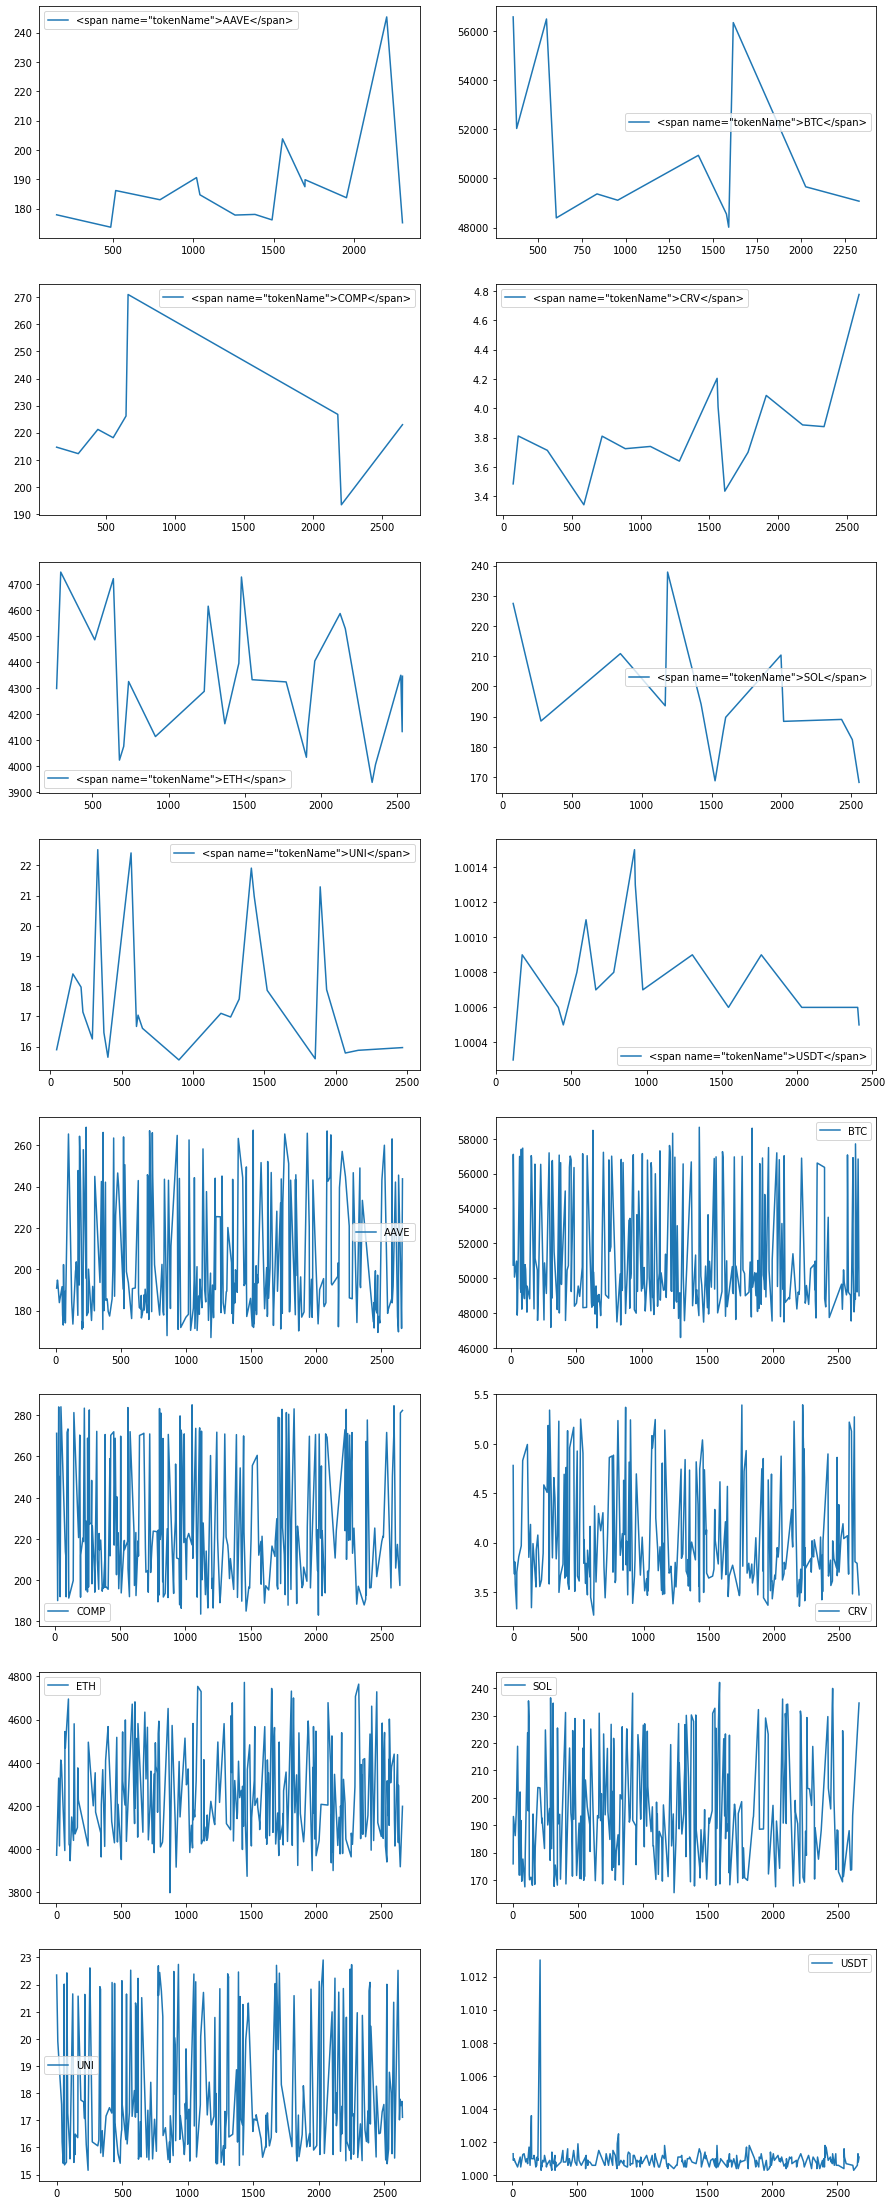

In [20]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


fix token names

In [21]:
df_res = df.token.str.split('_', expand=True)
df_res.columns = ['token']
df_res['token'] = df_res.token.str.strip()
df_res['token'] = df_res.token.str.replace(' ', '')
df_res['token'] = df_res.token.str.replace('"', '')
df_res['token'] = df_res.token.str.replace('=', '')
df_res['token'] = df_res.token.str.replace('/', '')
df_res['token'] = df_res.token.str.replace('<spannametokenName>', '')
df_res['token'] = df_res.token.str.replace('<span>', '')
# df_res['token'] = df_res.token.str.replace('<span name"tokenName">', '')

In [22]:
df['token'] = df_res
df

<ipython-input-22-d0cb3cc55b25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = df_res


,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,182.4900,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2661,2021-12-01 17:00:00,284.1400,284.8900,282.1800,282.3400,4.782140e+02,NaN,COMP,ETH
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,231.1080,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2360 non-null   object 
 1   open       2360 non-null   float64
 2   high       2360 non-null   float64
 3   low        2360 non-null   float64
 4   close      2360 non-null   float64
 5   volume     2360 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2360 non-null   object 
 8   chain      2360 non-null   object 
dtypes: float64(6), object(3)
memory usage: 184.4+ KB


plot by token again

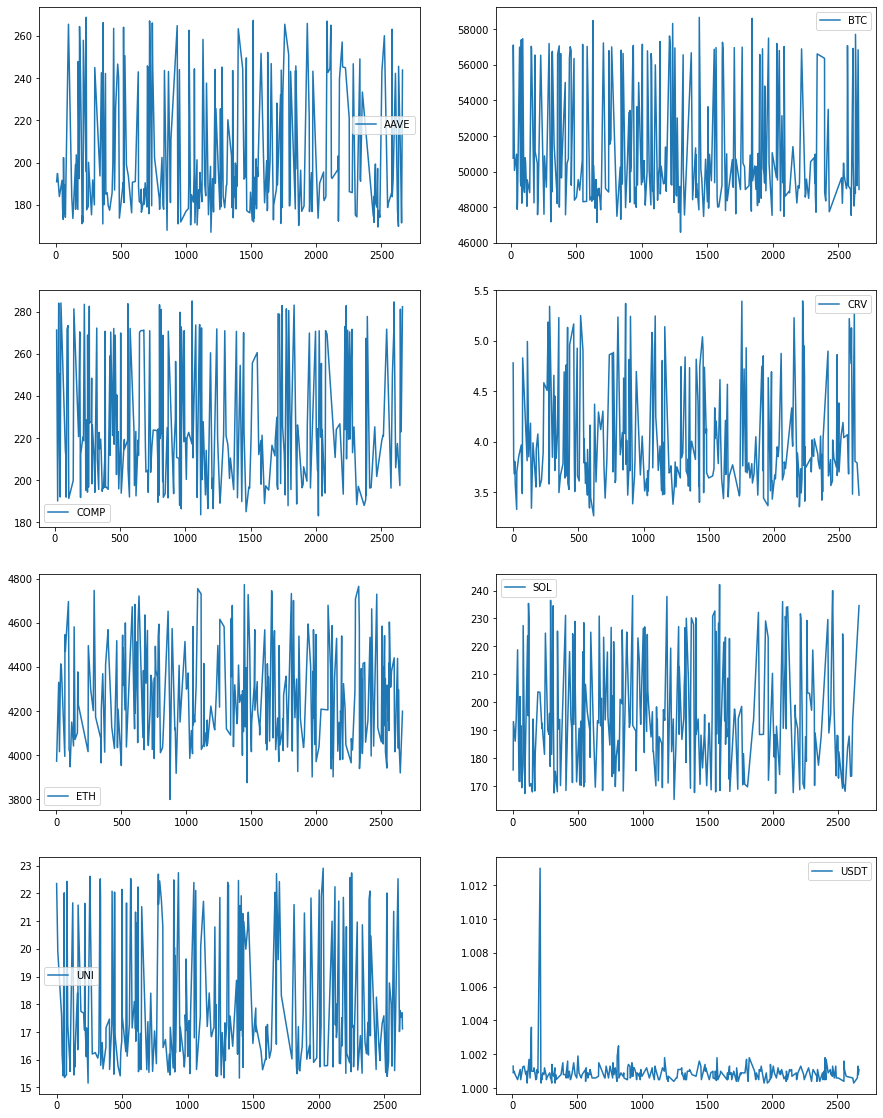

In [24]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


looks good

plot volume

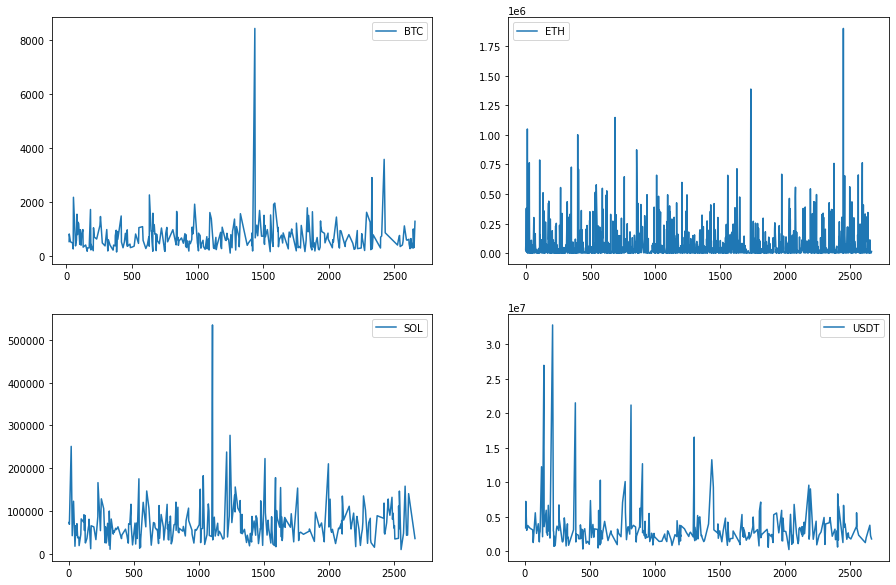

In [25]:
chains_in_df = df.chain.unique()

fig, axes = plt.subplots(nrows=math.ceil(chains_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chains_in_df.size / 2)))

idx = 0
for label, df_chain in df[['chain', 'volume']].groupby('chain'):
    df_chain['volume'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

remove outliers setting them to multiple of mean

In [26]:
df1 = df
btcmv = df1.loc[df['chain'] == 'BTC', 'volume'].mean()
df1.loc[((df1['chain'] == 'BTC') & (df1['volume'] >= 3*btcmv)), 'volume'] = 2*btcmv

ethmv = df1.loc[df['chain'] == 'ETH', 'volume'].mean()
df1.loc[((df1['chain'] == 'ETH') & (df1['volume'] >= 3*ethmv)), 'volume'] = 2*ethmv

solmv = df1.loc[df['chain'] == 'SOL', 'volume'].mean()
df1.loc[((df1['chain'] == 'SOL') & (df1['volume'] >= 3*solmv)), 'volume'] = 2*solmv

usdtmv = df1.loc[df['chain'] == 'USDT', 'volume'].mean()
df1.loc[((df1['chain'] == 'USDT') & (df1['volume'] >= 3*usdtmv)), 'volume'] = 2*usdtmv


/Users/alexmccall/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [27]:
# idx = 0
# for label, df_token in df1[['token','volume']].groupby('token'):
#     mv = df_token['volume'].mean()
#     df_token.loc[df_token['volume'] >= 3*mv, 'volume'] #= 3*mv
#     print(3*mv)
#     print(df_token)


In [28]:
vol = df1['close']*df1['volume']
df1['volumeUSD'] = vol

<ipython-input-28-a5b729df5b56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['volumeUSD'] = vol


In [29]:
chains_in_df1 = df1.chain.unique()
chains_in_df1

array(['ETH', 'SOL', 'USDT', 'BTC'], dtype=object)

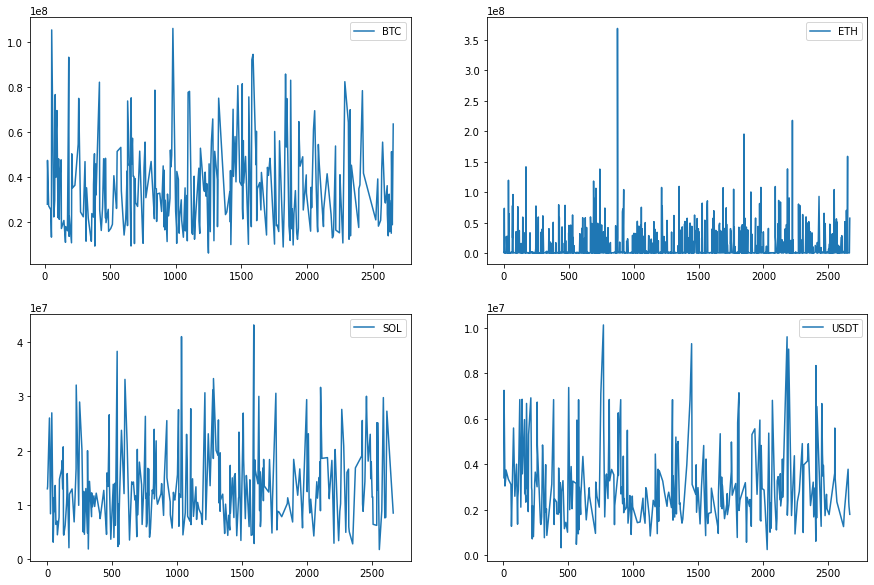

In [30]:
fig, axes = plt.subplots(nrows=math.ceil(chains_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chains_in_df1.size / 2)))

idx = 0
for label, df_chain in df1[['chain', 'volumeUSD']].groupby('chain'):
    df_chain['volumeUSD'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1